In [84]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sympy as sym

In [8]:
x = sym.symbols('x')
y = sym.symbols('y')
print(x, y)

x y


In [11]:
f = x*y + sym.exp(x) + sym.log(y)
print(f)

x*y + exp(x) + log(y)


In [28]:
w1 = x
w2 = y
w3 = sym.exp(x)
w4 = x * y
w5 = sym.log(y)
w6 = w3 + w4 + w5

sym.Matrix([w1, w2, w3, w4, w5, w6])

Matrix([
[                    x],
[                    y],
[               exp(x)],
[                  x*y],
[               log(y)],
[x*y + exp(x) + log(y)]])

In [107]:
G = nx.DiGraph()
G.add_edges_from(
    [
        (w1, w3, {'operator': 'exp', 'derivative': w3}),
        (w1, w4, {'operator': 'mul', 'derivative': w2}),
        (w2, w4, {'operator': 'mul', 'derivative': w1}),
        (w2, w5, {'operator': 'ln', 'derivative': 1 / w2}),
        (w3, w6, {'operator': 'add', 'derivative': 1}),
        (w4, w6, {'operator': 'add', 'derivative': 1}),
        (w5, w6, {'operator': 'add', 'derivative': 1}),
    ]
)

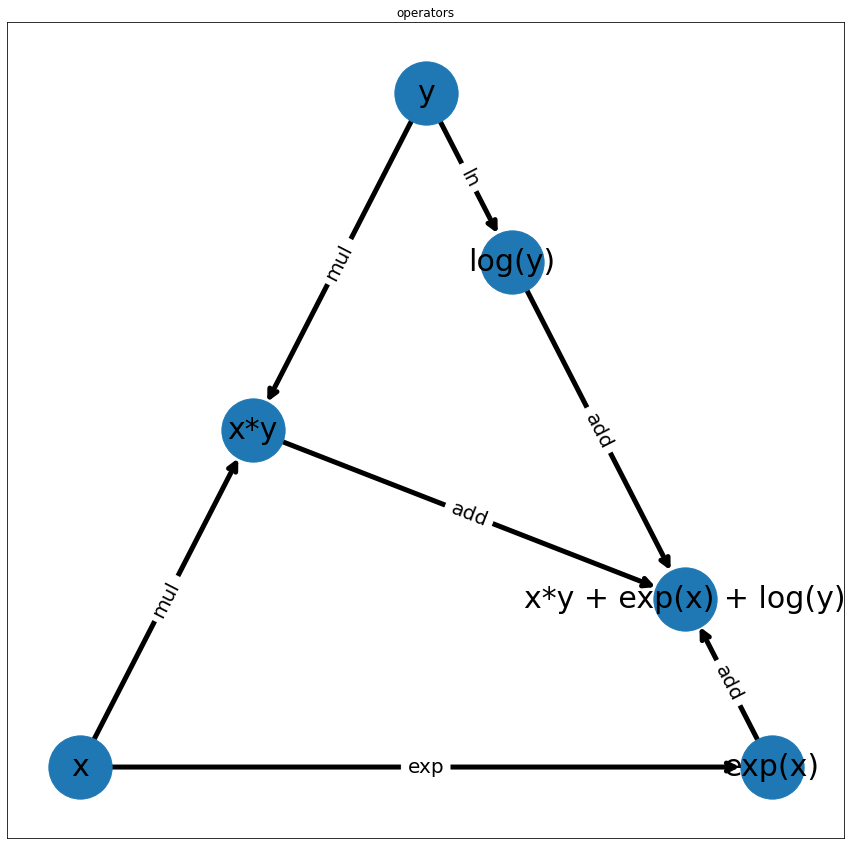

In [131]:
pos = nx.planar_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.spiral_layout(G)
edge_labels_operator = nx.get_edge_attributes(G, 'operator')

plt.figure(figsize=(15, 15))
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_size=4000,
    width=5,
    arrowstyle='->',
    arrowsize=20,
    font_size=30
)
nx.draw_networkx_edge_labels(
    G, 
    pos,
    edge_labels_operator,
    font_size=20
)
plt.title('operators')
plt.show()

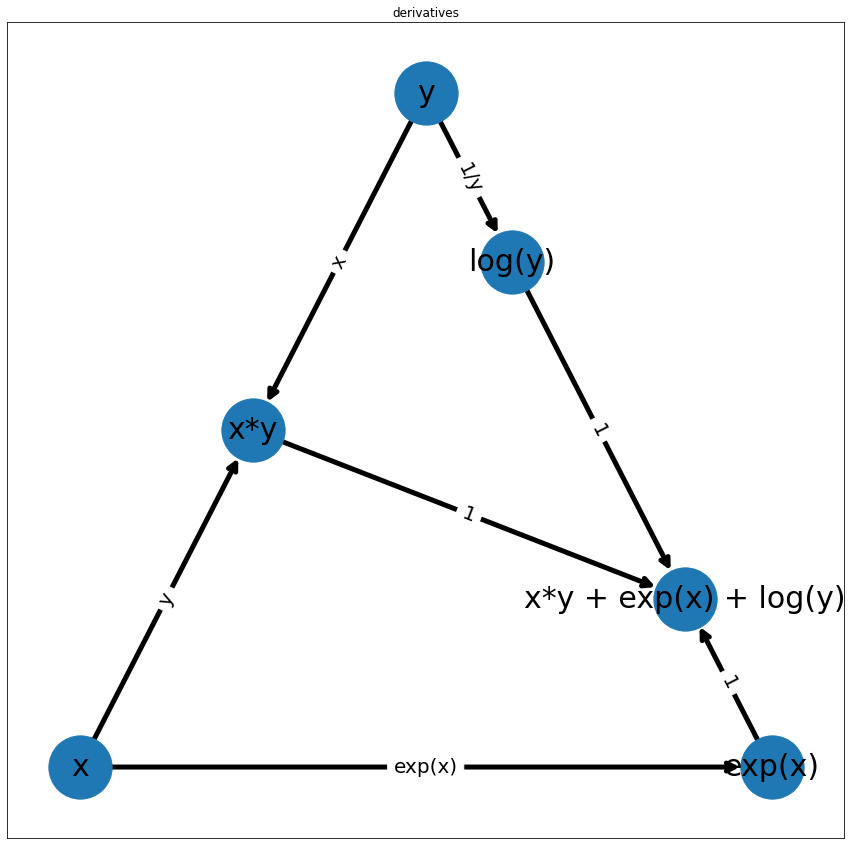

In [132]:
pos = nx.planar_layout(G)
edge_labels_derivative = nx.get_edge_attributes(G, 'derivative')

plt.figure(figsize=(15, 15))
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_size=4000,
    width=5,
    arrowstyle='->',
    arrowsize=20,
    font_size=30
)
nx.draw_networkx_edge_labels(
    G, 
    pos,
    edge_labels_derivative,
    font_size=20
)
plt.title('derivatives')
plt.show()

In [160]:
x_paths = list(nx.all_simple_paths(G, w1, w6))
print(f'{x_paths} -- all paths connecting w1 to w6, i.e. x to f(x,y)\n')

x_sums = []
for k, x_path in enumerate(x_paths):
    x_prods = []
    for i in range(len(x_path)):
        x_path_key = tuple(x_path[i: i + 2])
        if len(x_path[i: i + 2]) > 1:
            print(
                f'{x_path_key} -- path nodes | '
                f'{edge_labels_derivative[x_path_key]} -- derivative'
            )
            x_prods.append(edge_labels_derivative[x_path_key])
    x_prods = np.prod(np.array(x_prods))
    print(f'{x_prods} -- derivative along path {k + 1}\n')
    x_sums.append(x_prods)

x_sums = np.sum(np.array(x_sums))
print(f'{x_sums} -- derivative f(x,y) w.r.t x')

[[x, exp(x), x*y + exp(x) + log(y)], [x, x*y, x*y + exp(x) + log(y)]] -- all paths connecting w1 to w6, i.e. x to f(x,y)

(x, exp(x)) -- path nodes | exp(x) -- derivative
(exp(x), x*y + exp(x) + log(y)) -- path nodes | 1 -- derivative
exp(x) -- derivative along path 1

(x, x*y) -- path nodes | y -- derivative
(x*y, x*y + exp(x) + log(y)) -- path nodes | 1 -- derivative
y -- derivative along path 2

y + exp(x) -- derivative f(x,y) w.r.t x


In [161]:
y_paths = list(nx.all_simple_paths(G, w2, w6))
print(f'{y_paths} -- all paths connecting w2 to w6, i.e. y to f(x,y)\n')

y_sums = []
for k, y_path in enumerate(y_paths):
    y_prods = []
    for i in range(len(y_path)):
        y_path_key = tuple(y_path[i: i + 2])
        if len(y_path[i: i + 2]) > 1:
            print(
                f'{y_path_key} -- path nodes | '
                f'{edge_labels_derivative[y_path_key]} -- derivative'
            )
            y_prods.append(edge_labels_derivative[y_path_key])
    y_prods = np.prod(np.array(y_prods))
    print(f'{y_prods} -- derivative along path {k + 1}\n')
    y_sums.append(y_prods)

y_sums = np.sum(np.array(y_sums))
print(f'{y_sums} -- derivative f(x,y) w.r.t y')

[[y, x*y, x*y + exp(x) + log(y)], [y, log(y), x*y + exp(x) + log(y)]] -- all paths connecting w2 to w6, i.e. y to f(x,y)

(y, x*y) -- path nodes | x -- derivative
(x*y, x*y + exp(x) + log(y)) -- path nodes | 1 -- derivative
x -- derivative along path 1

(y, log(y)) -- path nodes | 1/y -- derivative
(log(y), x*y + exp(x) + log(y)) -- path nodes | 1 -- derivative
1/y -- derivative along path 2

x + 1/y -- derivative f(x,y) w.r.t y
